In [1]:
import os
import sys
import json
from pathlib import Path
sys.path.append(os.path.abspath('..'))
from constants import BASE_DIR
from pcdms.InpaintingStage import *

2025-06-11 17:05:54.076756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-11 17:05:54.218695: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-11 17:05:54.255580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-11 17:05:54.542573: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-11 17:05:56.175227: W tensorflow/compiler/tf2

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
stage_config = InpaintingConfig(
    preloaded_feature_dino_path = BASE_DIR / "datasets/celebrities/mo_salah/dino.pt",
    preloaded_feature_clip_path = BASE_DIR / "datasets/celebrities/mo_salah/clip.pt"
)
stage = InpaintingStage(stage_config)

2025-06-11 17:06:02.859 | INFO     | pcdms.InpaintingStage:load_pipeline:155 - start loading pipeline ...


Loading Inpainting Stage Pipeline:   0%|          | 0/5 [00:00<?, ?it/s]

Some weights of Stage2_InapintUNet2DConditionModel were not initialized from the model checkpoint at stabilityai/stable-diffusion-2-1-base and are newly initialized: ['class_embedding.linear_2.weight', 'class_embedding.linear_2.bias', 'class_embedding.linear_1.weight', 'class_embedding.linear_1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of Stage2_InapintUNet2DConditionModel were not initialized from the model checkpoint at stabilityai/stable-diffusion-2-1-base and are newly initialized because the shapes did not match:
- conv_in.weight: found shape torch.Size([320, 4, 3, 3]) in the checkpoint and torch.Size([320, 9, 3, 3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/aliaagheis/projects/Ad-Image-Generation/src/pcdms/InpaintingStage.py:177: FutureWarning: You are using `torch.load` with `weights_only=Fal

In [18]:
sample_input_1 = InpaintingSampleInput(
    s_img_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/cleaned/Frame 1.png'),
    t_img_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/cleaned/Frame 27.png'),
    s_pose_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/poses/Frame 1.png'),
    t_pose_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/poses/Frame 27.png'),
    image_size=(512, 512)
)

sample_input_2 = InpaintingSampleInput(
    s_img_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/cleaned/Frame 42.png'),
    t_img_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/cleaned/Frame 25.png'),
    s_pose_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/poses/Frame 42.png'),
    t_pose_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/poses/Frame 25.png'),
    image_size=(512, 512)
)

sample_input_3 = InpaintingSampleInput(
    s_img_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/cleaned/Frame 1.png'),
    t_img_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/cleaned/Frame 25.png'),
    s_pose_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/poses/Frame 1.png'),
    t_pose_path=Path(BASE_DIR / 'datasets/celebrities/mo_salah/poses/Frame 25.png'),
    image_size=(512, 512)
)

In [19]:
outputs = stage([sample_input_1, sample_input_2, sample_input_3], InpaintingInferenceConfig(num_inference_steps=50, guidance_scale=2.5))

  0%|          | 0/50 [00:00<?, ?it/s]

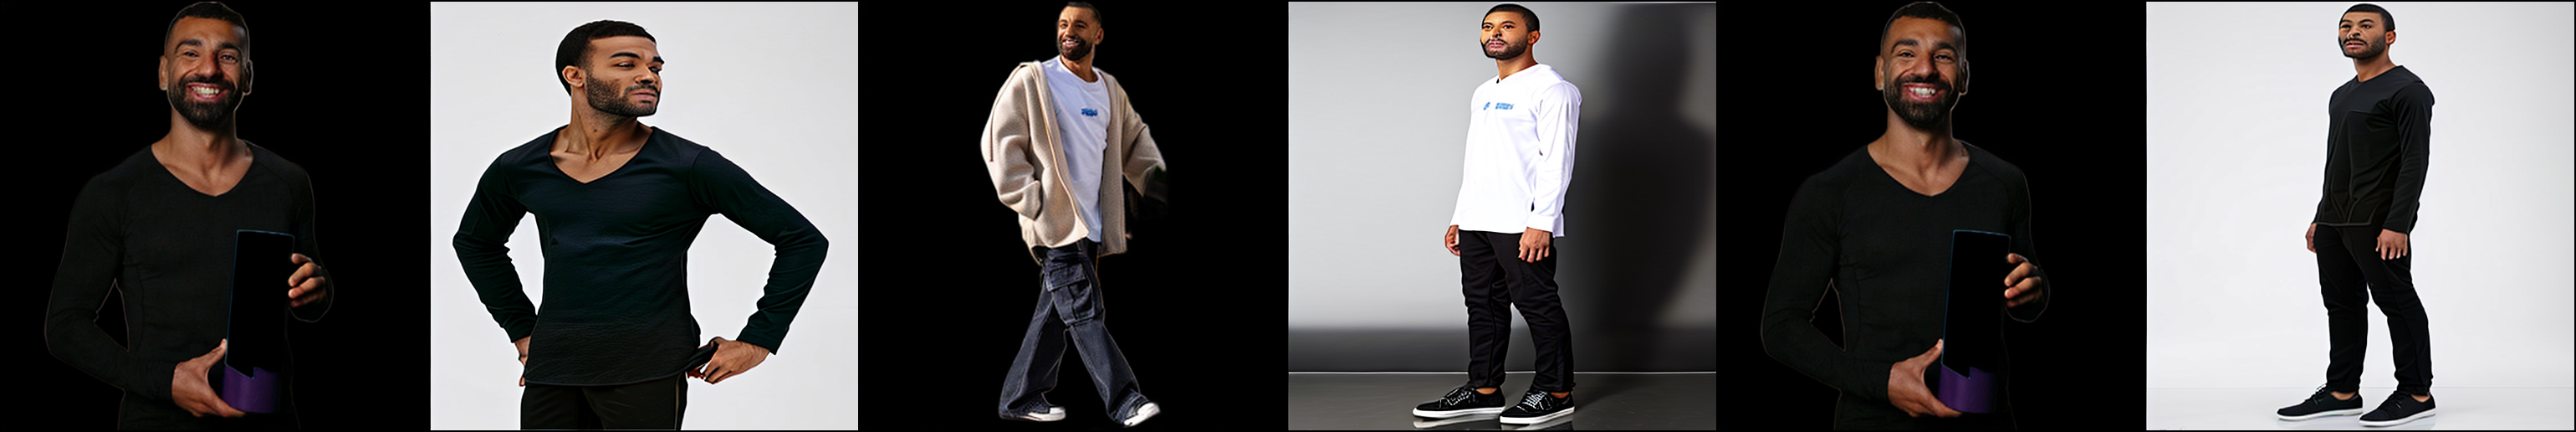

In [20]:
from utils import show_images
show_images(outputs)